# This notebook comprises of Exploratory Data Analysis and Data Transformation.

# The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we have to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [2]:
# Importing Libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [203]:
# Reading data
training_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

# Let's have a look at our data

In [204]:
training_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<img src="Data dictionary.png">

In [205]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# What does info() function tell us?
1. There are 5 variables with data type as integer, 2 with float, & 5 as object.
2. Also Column cabin has more than 77% missing values, so ill drop this column later. 
3. Column Embarked has 2 missing values which can be easily imputed
4. Let's see which strategies can be used to handle missing values in Age column.

In [206]:
training_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [207]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# What does describe() function tell us?
1. Gives a general overview on the spread of our data is and also we can figure out some basic ouliers through this.
2. For Eg: minimum fare is 0, and maximum is 512 which seems like outliers if we see our 1, 2, 3 quartiles.
3. Describe can be used only for numerical variables

# Data Visualization.

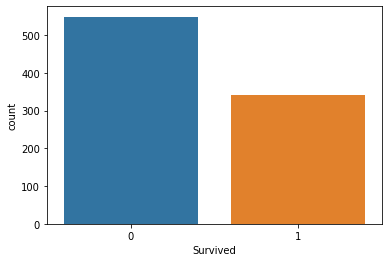

In [208]:
# we will analyze categorical variables:
sns.countplot(x= 'Survived', data = training_data);

# Count of survival is less.

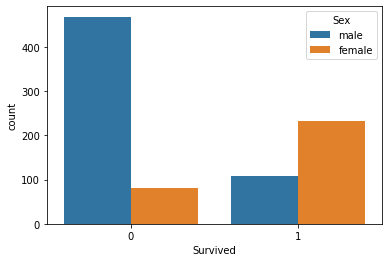

In [209]:
# Now we will check survival rate with respect to gender:
sns.countplot(x= 'Survived',hue='Sex',  data = training_data);

# Seeing plot we can say that survival rate of female is high.

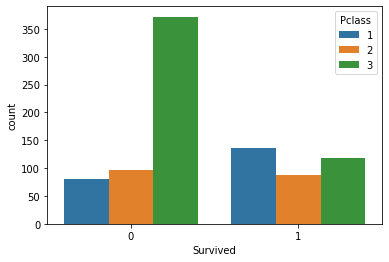

In [210]:
# Now we will check survival rate with respect to Pclass:
sns.countplot(x= 'Survived',hue='Pclass',  data = training_data);

# Seeing plot we can say that survival rate of passengers in 1st class is high on the other side, count of survival for passengers of class-3 was very low 

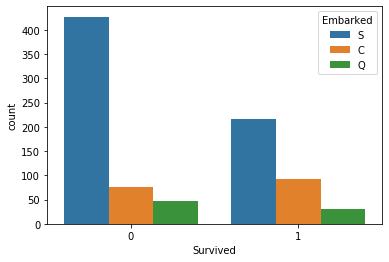

In [211]:
# Now we will check survival rate with respect to Embarked
sns.countplot(x= 'Survived',hue='Embarked',  data = training_data);

# Seeing plot we can say that maximum people are from S = Southampton, and
# Survival rate of people from C = Cherbourg is decent.

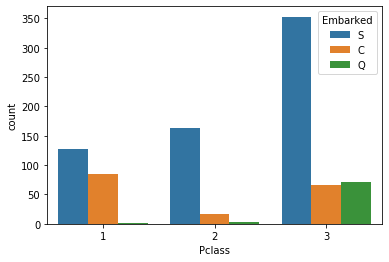

In [212]:
# Now we will check Pclass with Embarked
sns.countplot(x= 'Pclass',hue='Embarked',  data = training_data)

# The reason above we saw S = Southampton had low rate of survival because majority of them are in class 3, 
# and survival rate of people from C = Cherbourg is decent because majority fo them belonged to 1st class.

(7, 0)

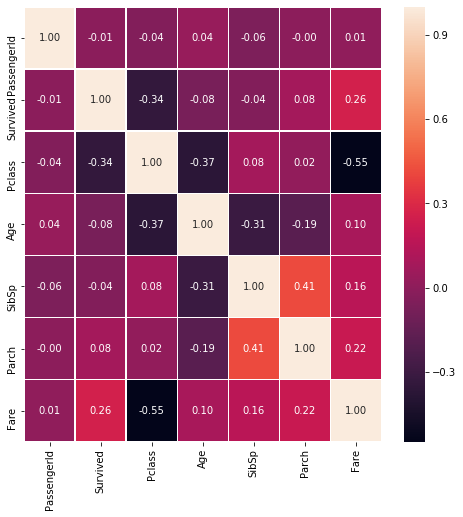

In [213]:
# Now we will check Collinearity among variables.
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(training_data.corr(), annot=True, linewidths=0.5, fmt='.2f',ax=ax)
ax.set_ylim(7, 0)

#  Correaltion Analysis
1. Eg: so it's common that higher the pclass, higher is the fare. Hence we would drop one of them to 
avoid redundant data, also passenger_Id will be dropped since not contributing to dependent variable.

2. Once all our categorical data has been converted we can also check Variance inflation factor, 
and correlation again.

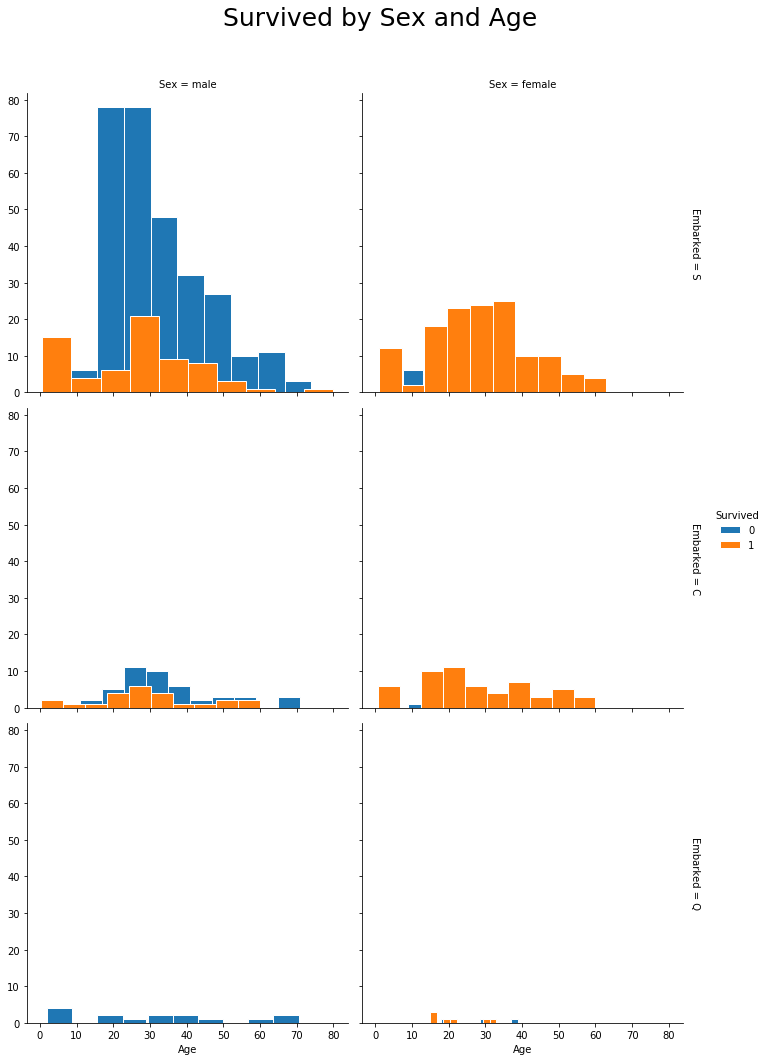

In [214]:
#Survived by Sex and Age and place they started there journey from.

ploteg = sns.FacetGrid(training_data,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived"
                  )
plotegg = ploteg.map(plt.hist, "Age", edgecolor = 'white').add_legend();
ploteg.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

# We can clearly see maximum survivor were women.

# Handling Outliers

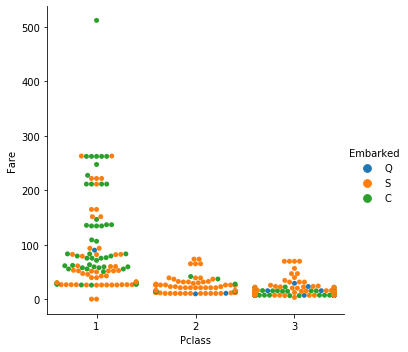

In [215]:
sns.catplot(x="Pclass", y="Fare",hue = "Embarked", kind="swarm", data=training_data);
# we can clearly see that majority of people who are from 'S' and 'Q' are in 2nd and 3rd class, also they are paying less fare.

In [216]:
training_data[(training_data.Pclass ==1)].median()

PassengerId    472.0000
Survived         1.0000
Pclass           1.0000
Age             37.0000
SibSp            0.0000
Parch            0.0000
Fare            60.2875
dtype: float64

# If we see median fare for passenger class 1 is 60.28 which says values at the extreme end are outliers

In [217]:
idxhigherend=training_data.index[training_data['Fare'] > 400]

In [218]:
idxhigherend

Int64Index([258, 679, 737], dtype='int64')

In [219]:
training_data.iloc[idxhigherend]
# We can drop these values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [220]:
training_data_copy = training_data.copy()

In [221]:
training_data.drop(idxhigherend, inplace=True)

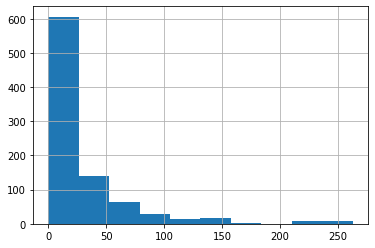

In [222]:
training_data['Fare'].hist()

In [223]:
training_data = training_data.reset_index()

In [224]:
idxlowerend = training_data.index[training_data['Fare'] < 5]

In [225]:
training_data.drop(idxlowerend, inplace=True)

In [226]:
training_data = training_data.reset_index()

In [227]:
training_data.shape

(872, 14)

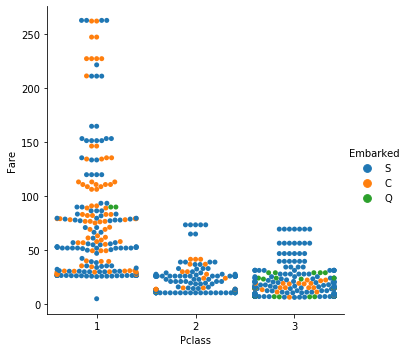

In [228]:
sns.catplot(x="Pclass", y="Fare",hue = "Embarked", kind="swarm", data=training_data);
# we can clearly see that majority of people who are from 'S' and 'Q' are in 2nd and 3rd class, also they are paying less fare.

In [229]:
training_data= training_data.drop(['level_0', 'index'], axis = 1)

In [230]:
# Let's drop columns which won't be useful for predictions, we are dropping cabin column because it has more than 60% missing vlaues.

training_data= training_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [231]:
training_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Handling Missing Values

In [232]:
# let's check missing values in both training and test data

training_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         169
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [233]:
# The above Graph will help us to deal with missing values in Embarked
training_data[training_data['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
810,1,1,female,62.0,0,0,80.0,NaN


# Let's see if we can find some similartities within passengers. EG: passengers with same range of fare. 

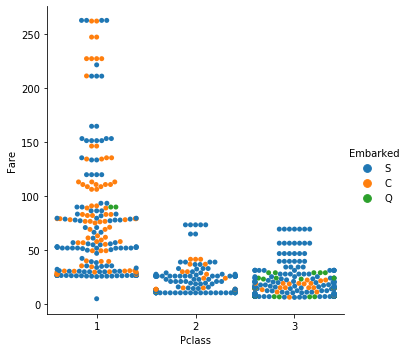

In [234]:
sns.catplot(x="Pclass", y="Fare",hue = "Embarked", kind="swarm", data=training_data);

# So if we see this plot we can say that passengers in PClass 1 are either from 'Southampton' or 'Cherbourg' so we can impute missing values with either of them.

In [235]:
training_data['Embarked'] = training_data['Embarked'].fillna('C')

In [236]:
training_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         169
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

# Let's deal with age column

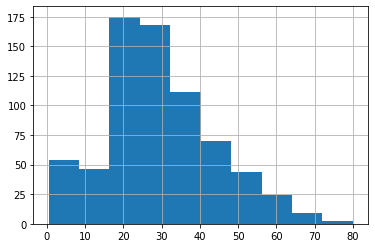

In [237]:
training_data['Age'].hist()

# We will impute missing values by taking Median of passengers that fall within same gender and passenger class.

In [238]:
median_male_age_class1 = training_data.groupby(['Sex', 'Pclass']).Age.median()['male'][1]
median_male_age_class1

median_female_age_class1 = training_data.groupby(['Sex', 'Pclass']).Age.median()['female'][1]
print(median_male_age_class1)
print('*'*100)
print(median_female_age_class1)

42.0
****************************************************************************************************
35.0


In [239]:
median_male_age_class2 = training_data.groupby(['Sex', 'Pclass']).Age.median()['male'][2]
median_male_age_class2

median_female_age_class2 = training_data.groupby(['Sex', 'Pclass']).Age.median()['female'][2]
print(median_male_age_class2)
print('*'*100)
print(median_female_age_class2)

30.0
****************************************************************************************************
28.0


In [240]:
median_male_age_class3 = training_data.groupby(['Sex', 'Pclass']).Age.median()['male'][3]
median_male_age_class3

median_female_age_class3 = training_data.groupby(['Sex', 'Pclass']).Age.median()['female'][3]
print(median_male_age_class3)
print('*'*100)
print(median_female_age_class3)

25.0
****************************************************************************************************
21.5


In [241]:
copy = training_data.copy()

In [242]:
copy.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         169
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [263]:
idx = copy.index[np.where((copy['Sex'] == "female") & (copy['Pclass'] == 3))]

In [264]:
idx

Int64Index([  2,   8,  10,  14,  18,  19,  22,  24,  25,  28,
            ...
            804, 811, 833, 836, 839, 844, 856, 863, 866, 869],
           dtype='int64', length=144)

In [265]:
copy['Age'].iloc[idx] = copy['Age'].iloc[idx].fillna(21.5)

In [266]:
copy.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [267]:
training_data = copy.copy()

In [268]:
#training_data.to_csv('training_dataafterEDA.csv')

# Let's apply same logic on validation set.

In [269]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [270]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


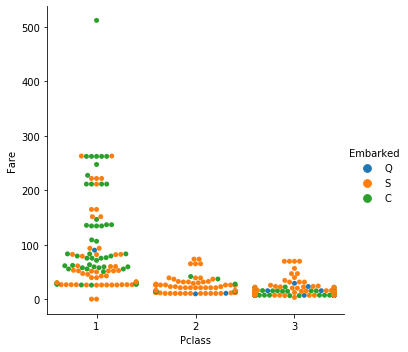

In [271]:
sns.catplot(x="Pclass", y="Fare",hue = "Embarked", kind="swarm", data=test_data);
# we can clearly see that majority of people who are from 'S' and 'Q' are in 2nd and 3rd class, also they are paying less fare.

In [272]:
test_data[(test_data.Pclass ==1)].median()

PassengerId    1094.0
Pclass            1.0
Age              42.0
SibSp             0.0
Parch             0.0
Fare             60.0
dtype: float64

# If we see median fare for passenger class 1 is 60 which says values at the extreme end are outliers

In [273]:
testidxhigherend=test_data.index[test_data['Fare'] > 400]

In [274]:
testidxhigherend

Int64Index([343], dtype='int64')

In [275]:
test_data.iloc[testidxhigherend]
# We can drop these values

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [276]:
test_data_copy = test_data.copy()

In [277]:
test_data.drop(testidxhigherend, inplace=True)

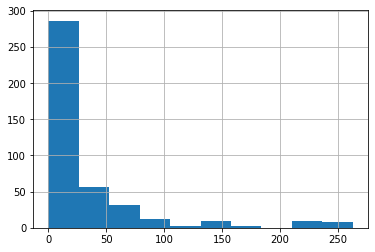

In [278]:
test_data['Fare'].hist()

In [279]:
test_data = test_data.reset_index()

In [280]:
testidxlowerend = test_data.index[test_data['Fare'] < 5]

In [281]:
test_data.drop(testidxlowerend, inplace=True)

In [282]:
test_data = test_data.reset_index()

In [283]:
test_data.shape

(414, 13)

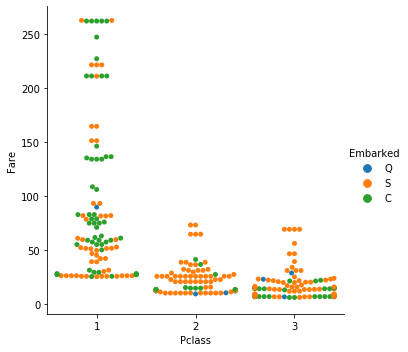

In [284]:
sns.catplot(x="Pclass", y="Fare",hue = "Embarked", kind="swarm", data=test_data);
# we can clearly see that majority of people who are from 'S' and 'Q' are in 2nd and 3rd class, also they are paying less fare.

In [285]:
test_data= test_data.drop(['level_0', 'index'], axis = 1)

In [286]:
# Let's drop columns which won't be useful for predictions, we are dropping cabin column because it has more than 60% missing vlaues.

test_data= test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

In [287]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [288]:
test_data.isnull().sum()

Pclass       0
Sex          0
Age         85
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [289]:
# The above Graph will help us to deal with missing values in Embarked
test_data[test_data['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
151,3,male,60.5,0,0,NaN,S


In [3]:
#test_data_eda = pd.read_csv('test_dataafterEDA.csv')

In [6]:
test_data_eda.drop('Unnamed: 0', inplace=True, axis = 1)

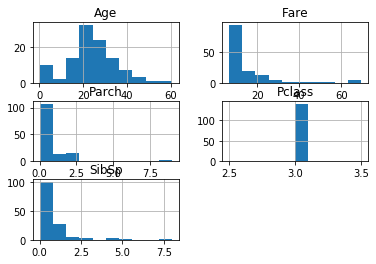

In [18]:
test_data_eda[(test_data_eda.Pclass == 3) & (test_data_eda.Embarked =='S')].hist();
# Seeing this we can impute missing value for fare in test dataset using median fare of people in same Pclass and where Embarked = 'S'.

In [21]:
test_data_eda[(test_data_eda.Pclass == 3) & (test_data_eda.Embarked =='S')].median()

Pclass     3.00
Age       24.00
SibSp      0.00
Parch      0.00
Fare       8.05
dtype: float64

In [22]:
test_data_eda['Fare'] = test_data_eda['Fare'].fillna(8.05)

In [23]:
test_data_eda.isnull().sum()

Pclass       0
Sex          0
Age         85
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

# Let's apply same logic for Age column as we did above in training dataset.

In [25]:
median_male_age_class1_test = test_data_eda.groupby(['Sex', 'Pclass']).Age.median()['male'][1]
median_male_age_class1_test

median_female_age_class1_test = test_data_eda.groupby(['Sex', 'Pclass']).Age.median()['female'][1]
print(median_male_age_class1_test)
print('*'*100)
print(median_female_age_class1_test)

42.0
****************************************************************************************************
39.0


In [26]:
median_male_age_class2_test = test_data_eda.groupby(['Sex', 'Pclass']).Age.median()['male'][2]
median_male_age_class2_test

median_female_age_class2_test = test_data_eda.groupby(['Sex', 'Pclass']).Age.median()['female'][2]
print(median_male_age_class2_test)
print('*'*100)
print(median_female_age_class2_test)

28.0
****************************************************************************************************
24.0


In [27]:
median_male_age_class3_test = test_data_eda.groupby(['Sex', 'Pclass']).Age.median()['male'][3]
median_male_age_class3_test

median_female_age_class3_test = test_data_eda.groupby(['Sex', 'Pclass']).Age.median()['female'][3]
print(median_male_age_class3_test)
print('*'*100)
print(median_female_age_class3_test)

24.0
****************************************************************************************************
22.0


In [28]:
test_copy = test_data_eda.copy()

In [29]:
test_copy.isnull().sum()

Pclass       0
Sex          0
Age         85
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [61]:
test_idx = test_copy.index[np.where((test_copy['Sex'] == "female") & (test_copy['Pclass'] == 3))]

In [62]:
test_idx

Int64Index([  1,   4,   6,   8,  18,  19,  31,  32,  35,  36,  48,  62,  65,
             69,  71,  78,  85,  86,  87,  89,  97, 103, 110, 112, 116, 124,
            126, 131, 137, 139, 152, 156, 158, 159, 164, 168, 187, 196, 198,
            199, 205, 213, 215, 224, 226, 248, 262, 266, 271, 278, 280, 281,
            282, 289, 302, 307, 311, 313, 331, 342, 344, 351, 356, 362, 364,
            372, 378, 379, 404, 405, 406, 408],
           dtype='int64')

In [63]:
test_copy['Age'].iloc[test_idx] = test_copy['Age'].iloc[test_idx].fillna(22)

In [64]:
test_copy.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [65]:
test_data_eda = test_copy.copy()

In [66]:
test_data_eda.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [67]:
test_data_eda.to_csv('test_data_afterEDA.csv')

In [68]:
training_data_eda = pd.read_csv('training_dataafterEDA.csv')

In [69]:
test_data_eda = pd.read_csv('test_data_afterEDA.csv')

In [71]:
training_data_eda.drop('Unnamed: 0', inplace = True, axis = 1)

In [72]:
training_data_eda.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# One-Hot encoding

Now there are different encoding techniques but which one to choose depends on machine learning model also. Since i'll be using Logistic Regression as of now, the issue with Logistic regression will be:
Eg: In our dataset, there is this feature called Embarked, represented by "S", "C", "Q". Now the computer only likes to work with numbers, and as a result we need to convert S, C, Q into numbers. If we decide to use Label Encoding: Like labelling S = 0, C = 1, Q = 2. This shows that Q=2 has more weight than S=0 & C = 1, this can lead to wrong predictions.

In [73]:
train_categorical_features = ['Pclass', 'Sex', 'Embarked']
for feature in train_categorical_features:
    dummies = pd.get_dummies(training_data_eda[feature]).add_prefix(feature + '_')
    training_data_eda = training_data_eda.join(dummies)

In [74]:
training_data_eda.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0,0,1,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1,0,0,1


In [75]:
test_categorical_features = ['Pclass', 'Sex', 'Embarked']
for feature in test_categorical_features:
    dummies = pd.get_dummies(test_data_eda[feature]).add_prefix(feature + '_')
    test_data_eda = test_data_eda.join(dummies)
    
# Found this particular code from, source: https://www.kaggle.com/reighns/titanic-a-complete-beginner-s-guide

In [76]:
test_data_eda.head()

,Unnamed: 0,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,34.5,0,0,7.8292,Q,0,0,1,0,1,0,1,0
1,1,3,female,47.0,1,0,7.0000,S,0,0,1,1,0,0,0,1
2,2,2,male,62.0,0,0,9.6875,Q,0,1,0,0,1,0,1,0
3,3,3,male,27.0,0,0,8.6625,S,0,0,1,0,1,0,0,1
4,4,3,female,22.0,1,1,12.2875,S,0,0,1,1,0,0,0,1


In [77]:
# let's drop useless features.
drop_column = ['Pclass','Sex', 'Embarked', 'Pclass_3', 'Sex_male', 'Embarked_S']
training_data_eda.drop(drop_column, axis=1, inplace = True)

drop_column = ['Unnamed: 0', 'Pclass','Sex', 'Embarked', 'Pclass_3', 'Sex_male', 'Embarked_S']
test_data_eda.drop(drop_column, axis=1, inplace = True)

In [78]:
training_data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 10 columns):
Survived      872 non-null int64
Age           872 non-null float64
SibSp         872 non-null int64
Parch         872 non-null int64
Fare          872 non-null float64
Pclass_1      872 non-null uint8
Pclass_2      872 non-null uint8
Sex_female    872 non-null uint8
Embarked_C    872 non-null uint8
Embarked_Q    872 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 38.4 KB


In [79]:
test_data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
Age           414 non-null float64
SibSp         414 non-null int64
Parch         414 non-null int64
Fare          414 non-null float64
Pclass_1      414 non-null uint8
Pclass_2      414 non-null uint8
Sex_female    414 non-null uint8
Embarked_C    414 non-null uint8
Embarked_Q    414 non-null uint8
dtypes: float64(2), int64(2), uint8(5)
memory usage: 15.1 KB


In [80]:
test_data_eda.to_csv('test_data_algorithm.csv')

In [82]:
training_data_eda.to_csv('training_data_algorithm.csv')

# This notebook ends here, please look into other notebooks for Feature selection, Algorithm selection and Evaluation.